In [2]:

import sqlite3 as sql
import pandas as pd
import numpy as np
import networkx as nx

import itertools

import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
all_participants = pd.read_csv('for_import_all_mitglieder_new_terms.CSV',sep=',')
print(all_participants)

participants_1986 = pd.read_csv('for_import_1986.CSV',sep=',')
participants_1986['occupation']=participants_1986['occupation'].fillna('not available')

participants_1989 = pd.read_csv('for_import_1989.CSV',sep=',')
participants_1989['occupation']=participants_1989['occupation'].str.strip()
participants_1989['occupation']=participants_1989['occupation'].fillna('not available')

participants_1991 = pd.read_csv('for_import_1991.CSV',sep=',')
participants_1991['occupation']=participants_1991['occupation'].str.strip()
participants_1991['occupation']=participants_1991['occupation'].fillna('not available')

participants_1992 = pd.read_csv('for_import_1992.CSV',sep=',')
participants_1992['occupation']=participants_1992['occupation'].str.strip()
participants_1992['occupation']=participants_1992['occupation'].fillna('not available')

participants_1994 = pd.read_csv('for_import_1994.CSV',sep=',')
participants_1994['occupation']=participants_1994['occupation'].str.strip()
participants_1994['occupation']=participants_1994['occupation'].fillna('not available')

participants_1995 = pd.read_csv('for_import_1995.CSV',sep=',')
participants_1995['occupation']=participants_1995.occupation.str.strip()
participants_1995['occupation']=participants_1995['occupation'].fillna('not available')

participants_1996 = pd.read_csv('for_import_1996.CSV',sep=',')
participants_1996['occupation']=participants_1996.occupation.str.strip()
participants_1996['occupation']=participants_1996['occupation'].fillna('not available')

participants_1997 = pd.read_csv('for_import_1997.CSV',sep=',')
participants_1997['occupation']=participants_1997.occupation.str.strip()
participants_1997['occupation']=participants_1997['occupation'].fillna('not available')

participants_1998 = pd.read_csv('for_import_1998.CSV',sep=',')
#participants_1998['occupation']=participants_1998.occupation.str.strip()
participants_1998['occupation']=participants_1998['occupation'].fillna('not available')
total_dataframe=pd.concat([participants_1986['name'],participants_1989['name'],participants_1991['name'],participants_1992['name'],participants_1994['name'],participants_1995['name'],participants_1996['name'],participants_1997['name'],participants_1998['name']])

## fill fk_person with corresponding pk_person 1986
participants_1986 = participants_1986.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1989
participants_1989 = participants_1989.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1991
participants_1991 = participants_1991.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1992
participants_1992 = participants_1992.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1994
participants_1994 = participants_1994.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1995
participants_1995 = participants_1995.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1996
participants_1996 = participants_1996.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1997
participants_1997 = participants_1997.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)

## fill fk_person with corresponding pk_person 1998
participants_1998 = participants_1998.merge(
    all_participants[['name', 'pk_person', 'gender']], 
    on='name', 
    how='left'
)
#print(participants_1986)





###

     pk_person                 name gender
0            1          A. Dreiding      m
1            2        Achim Fischer      m
2            3  Adham Abel-el-Razik      m
3            4         Adolf Muschg      m
4            5         Adrian Russi      m
..         ...                  ...    ...
800        801    Wolf-Rüdiger Huck      m
801        802        Yehuda Elkana      m
802        803        Yolanda Hecht      w
803        804      Yoshikazu Ikeda      m
804        805            Yuko Yagi      w

[805 rows x 3 columns]


In [4]:
#save dataframes to import to database
#print(participants_1998)
#print(participants_1998[['pk_participation','pk_event','fk_person','country','institute','occupation']])

dataframe_for_export=pd.concat([participants_1986[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1989[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1991[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1992[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1994[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1995[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1996[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1997[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']],
                                participants_1998[['pk_participation','pk_event','pk_person','name','country','institute','occupation','subject','gender','talk']]])
print(dataframe_for_export)
dataframe_for_export['occupation']=dataframe_for_export['occupation'].str.strip()
dataframe_for_export['country']=dataframe_for_export['country'].str.strip()
dataframe_for_export['institute']=dataframe_for_export['institute'].str.strip()
all_occupations=dataframe_for_export['occupation'].unique()
print(all_occupations)
all_countries=dataframe_for_export['country'].unique()
print(all_countries)
all_institutes=dataframe_for_export['institute'].unique()
print(all_institutes)

#switch out "Oesterreich" for "Österreich"
print(dataframe_for_export.loc[dataframe_for_export['country'].isin(['Oesterreich']),'country'])
dataframe_for_export.loc[dataframe_for_export['country'].isin(['Oesterreich']),'country'] = 'Österreich'

#switch out "SChweiz" for "Schweiz"
print(dataframe_for_export.loc[dataframe_for_export['country'].isin(['SChweiz']),'country'])
dataframe_for_export.loc[dataframe_for_export['country'].isin(['SChweiz']),'country'] = 'Schweiz'

#alles zu "Uni Bern"
['Universität Bern', 'Uni-Bern' ]
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Universität Bern', 'Uni-Bern','UNI Bern' ]),'institute'] = 'Uni Bern'
#alles zu "Uni Genf"
['Univ. Genf']
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Univ. Genf']),'institute'] = 'Uni Genf'

#alles zu "Uni Zürich"
['Uni-Zürich','UNI-Z']
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Uni-Zürich','UNI-Z']),'institute'] = 'Uni Zürich'

#alles zu "Uni St. Gallen"
['Uni St. Gallen.']
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Uni St. Gallen.']),'institute'] = 'Uni St. Gallen'

#alles zu "Uni Fribourg"
['UNI-Fribourg']
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['UNI-Fribourg']),'institute'] = 'Uni Fribourg'

#alles zu "Max-Planck-Institut"
['Max Planck Institut für Physik']
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Max Planck Institut für Physik']),'institute'] = 'Max-Planck-Institut'

#alles zu "Uni Berlin"
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Univ. Berlin','Universität Berlin']),'institute'] = 'Uni Berlin'

#alles zu "Uni Rom"
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['Univ. Rom','Universität Rom']),'institute'] = 'Uni Rom'

#alles zu "Uni München"
dataframe_for_export.loc[dataframe_for_export['institute'].isin(['München','Universität München']),'institute'] = 'Uni München'
all_institutes=dataframe_for_export['institute'].unique()
print(all_institutes)

all_subjects=dataframe_for_export['subject'].unique()
print(all_subjects)


print(range(1,len(dataframe_for_export['pk_participation'])))
dataframe_for_export['pk_participation'] = range(1,len(dataframe_for_export['pk_participation'])+1)

count_pks=dataframe_for_export['pk_participation'].value_counts()
print(count_pks)
dataframe_for_export.to_csv('for_database_import_participation.csv',sep=',')

     pk_participation  pk_event  pk_person                  name  country  \
0                   1      1986        135  Christof Appenzeller      NaN   
1                   2      1986        688     Silvan Aschwanden      NaN   
2                   3      1986        445         M. C. Bateson      NaN   
3                   4      1986        236        Ezio Battistel      NaN   
4                   5      1986        147     Claudia Betschart      NaN   
..                ...       ...        ...                   ...      ...   
139              1260      1998        156    Clemens Wögerbauer  Schweiz   
140              1261      1998        562       Octavio Wohlers  Schweiz   
141              1262      1998        248     Frank Zimmermnann  Schweiz   
142              1263      1998        717    Susanne Zimmermann  Schweiz   
143              1264      1998        727       Therese Zweifel  Schweiz   

    institute     occupation subject gender  talk  
0         NaN  not avai

In [5]:
#for each person how many of their participations at cortona were accompanied by a talk
total_dataframe=pd.concat([participants_1986[['name','talk']],participants_1989[['name','talk']],participants_1991[['name','talk']],participants_1992[['name','talk']],
                           participants_1994[['name','talk']],participants_1995[['name','talk']],participants_1996[['name','talk']],participants_1997[['name','talk']],participants_1998[['name','talk']]])
print(total_dataframe)
total_dataframe['talk'] = total_dataframe['talk'].replace({np.nan: 'no talk', 1: 'talks'})

#count_names=total_dataframe.value_counts().reset_index(name='count')
result_matrix = pd.crosstab(total_dataframe['name'], total_dataframe['talk'], margins=True, margins_name='Total')
result_matrix=result_matrix.sort_values(by=['Total'],ascending=False)

print("Complete matrix with totals:")
print(result_matrix)
result_matrix.to_csv('count_output.csv',sep=',')

#what percentage of people that never gave talks came more than once?

mask=result_matrix['talks']==0

only_participants=result_matrix[mask]
only_participants_value_count=only_participants['no talk'].value_counts()
print(only_participants_value_count)


                     name  talk
0    Christof Appenzeller   NaN
1       Silvan Aschwanden   NaN
2           M. C. Bateson   1.0
3          Ezio Battistel   NaN
4       Claudia Betschart   NaN
..                    ...   ...
139    Clemens Wögerbauer   NaN
140       Octavio Wohlers   NaN
141     Frank Zimmermnann   NaN
142    Susanne Zimmermann   NaN
143       Therese Zweifel   NaN

[1265 rows x 2 columns]
Complete matrix with totals:
talk                 no talk  talks  Total
name                                      
Total                    926    339   1265
Suzanne Monard             2      7      9
Willi Gutmann              0      9      9
Pier Luigi Luisi           8      1      9
Claudia Scheidegger        0      9      9
...                      ...    ...    ...
Verena Nil                 1      0      1
Vetter                     1      0      1
Vidyadhar Vaidya           0      1      1
Viola Rohner               1      0      1
Vreni Osterwalder          1      0      1

[8

In [6]:
check=dataframe_for_export['name']=='Vanja Palmers'
print(dataframe_for_export[check])

     pk_participation  pk_event  pk_person           name     country  \
63                 64      1986        777  Vanja Palmers         NaN   
131               389      1991        777  Vanja Palmers  Österreich   
95                492      1992        777  Vanja Palmers     Schweiz   
28                575      1994        777  Vanja Palmers     Schweiz   

    institute     occupation subject gender  talk  
63        NaN  not available     NaN      w   1.0  
131       NaN  not available     NaN      w   NaN  
95        NaN  not available     NaN      w   1.0  
28        NaN  not available     NaN      w   NaN  


0      NaN
1      NaN
2      1.0
3      NaN
4      NaN
      ... 
139    NaN
140    NaN
141    NaN
142    NaN
143    NaN
Name: talk, Length: 1265, dtype: float64
0      no talk
1      no talk
2        talks
3      no talk
4      no talk
        ...   
139    no talk
140    no talk
141    no talk
142    no talk
143    no talk
Name: talk, Length: 1265, dtype: object
talk     no talk     talks
gender                    
m       0.564795  0.587021
w       0.435205  0.412979


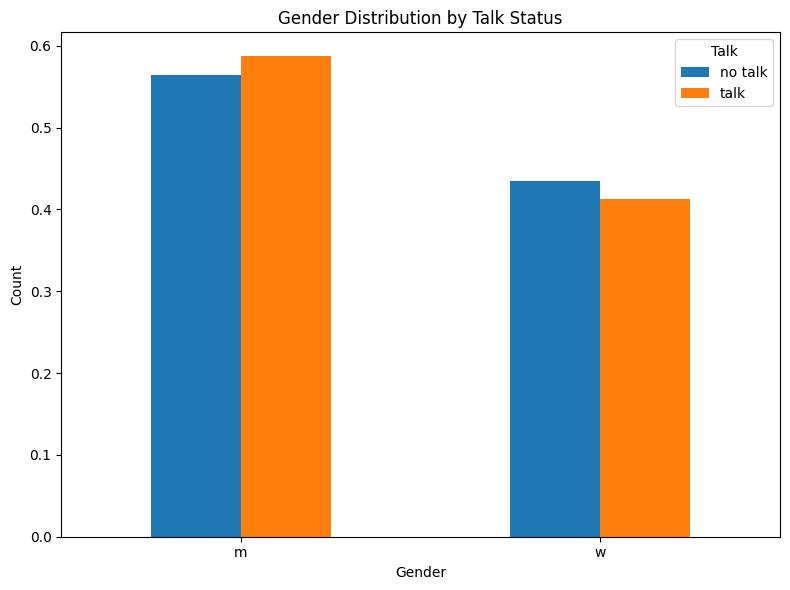

In [7]:
#get a distirbution for gender for the participants vs the people giving a talk

print(dataframe_for_export['talk'])
dataframe_for_export['talk'] = dataframe_for_export['talk'].replace({np.nan: 'no talk', 1: 'talks'})
print(dataframe_for_export['talk'])
crosstab = pd.crosstab(dataframe_for_export['gender'], dataframe_for_export['talk'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['no talk', 'talk'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


pk_event   1986      1989      1991      1992      1994      1995      1996  \
gender                                                                        
m         0.624  0.583333  0.568345  0.593333  0.525547  0.577236  0.567901   
w         0.376  0.416667  0.431655  0.406667  0.474453  0.422764  0.432099   

pk_event      1997    1998  
gender                      
m         0.542484  0.5625  
w         0.457516  0.4375  


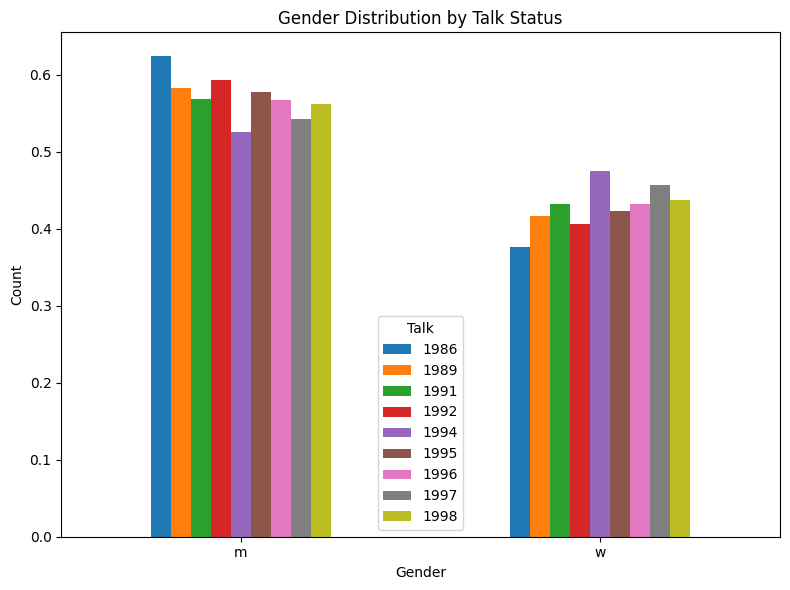

In [8]:
crosstab = pd.crosstab(dataframe_for_export['gender'], dataframe_for_export['pk_event'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['1986', '1989','1991','1992','1994','1995','1996','1997','1998'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

talk          no talk     talks
country                        
Australien   0.000000  0.003460
Belgien      0.001176  0.006920
Chile        0.000000  0.003460
Deutschland  0.055294  0.148789
England      0.004706  0.003460
France       0.000000  0.003460
Frankreich   0.001176  0.010381
Indien       0.002353  0.010381
Israel       0.002353  0.000000
Italien      0.023529  0.038062
Italy        0.000000  0.003460
Japan        0.003529  0.000000
Marokko      0.000000  0.003460
Niederlande  0.000000  0.003460
Schweden     0.000000  0.003460
Schweiz      0.874118  0.612457
Slovenien    0.000000  0.003460
Spanien      0.000000  0.006920
UK           0.001176  0.000000
USA          0.014118  0.086505
Österreich   0.016471  0.048443


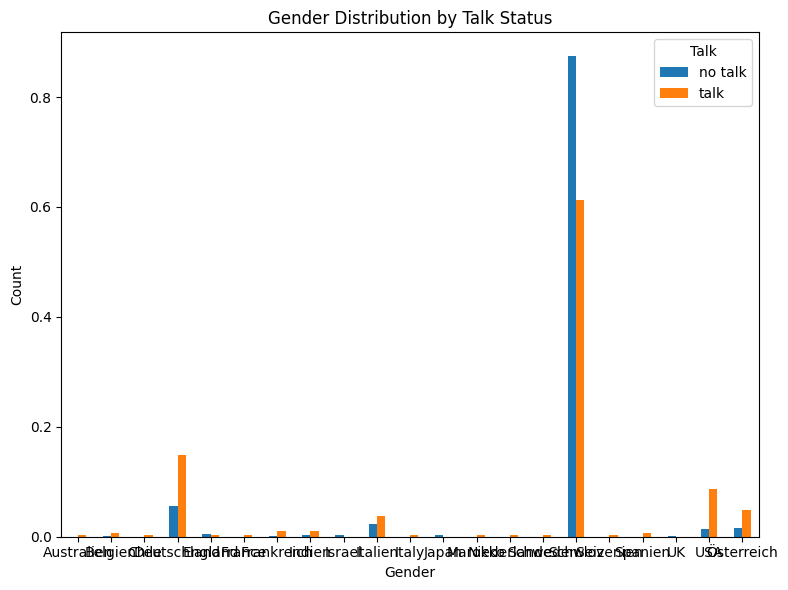

In [76]:
crosstab = pd.crosstab(dataframe_for_export['country'], dataframe_for_export['talk'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('country')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['m', 'w'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gender              m         w
country                        
Australien   0.001553  0.000000
Belgien      0.004658  0.000000
Chile        0.001553  0.000000
Deutschland  0.071429  0.088889
England      0.004658  0.004040
France       0.001553  0.000000
Frankreich   0.004658  0.002020
Indien       0.003106  0.006061
Israel       0.001553  0.002020
Italien      0.026398  0.028283
Italy        0.001553  0.000000
Japan        0.003106  0.002020
Marokko      0.000000  0.002020
Niederlande  0.001553  0.000000
Schweden     0.001553  0.000000
Schweiz      0.805901  0.810101
Slovenien    0.001553  0.000000
Spanien      0.003106  0.000000
UK           0.000000  0.002020
USA          0.037267  0.026263
Österreich   0.023292  0.026263


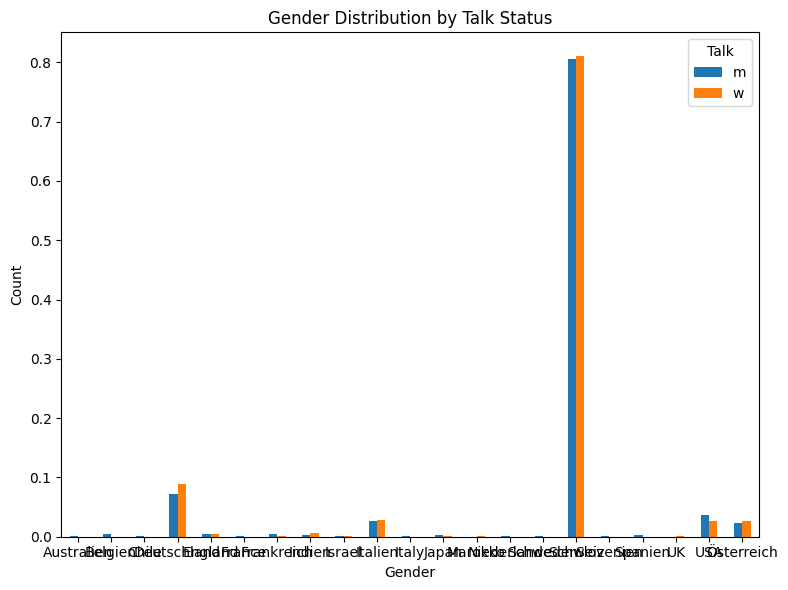

In [84]:
crosstab = pd.crosstab(dataframe_for_export['country'], dataframe_for_export['gender'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['m', 'w'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gender                    m         w
occupation                           
Akademisch         0.027701  0.047882
Architekt:in       0.006925  0.001842
Biolog:in          0.000000  0.001842
Chemiker:in        0.048476  0.005525
DO                 0.224377  0.141805
Dozent:in          0.095568  0.034991
Editor             0.001385  0.000000
Entrepeneur:in     0.000000  0.001842
Ingenieur:in       0.001385  0.000000
Journalist:in      0.001385  0.001842
Künstler:in        0.054017  0.049724
LE                 0.000000  0.001842
Lehrer:in          0.004155  0.007366
MA                 0.066482  0.051565
Medizin            0.019391  0.031308
Na                 0.000000  0.001842
Office             0.018006  0.018416
Physiker:in        0.001385  0.000000
Rechtsanwältin     0.000000  0.001842
ST                 0.096953  0.119705
Schüler:in         0.002770  0.001842
Therapie           0.015235  0.081031
Unternehmer:in     0.008310  0.005525
Workshopleiter:in  0.012465  0.025783
not availabl

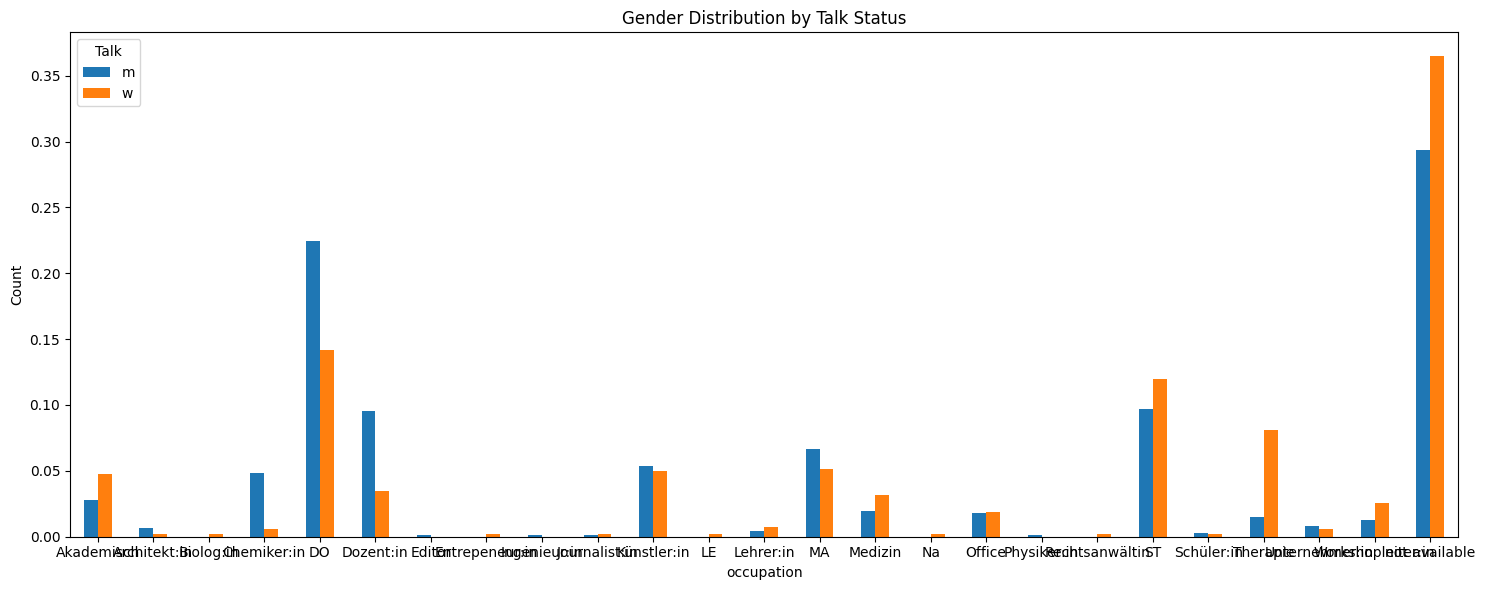

In [9]:
crosstab = pd.crosstab(dataframe_for_export['occupation'], dataframe_for_export['gender'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(15, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['m', 'w'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gender               m         w
subject                         
3 WI          0.000000  0.007143
Abt. 1        0.000000  0.014286
Abt. 3B       0.003953  0.007143
Abt. 3b       0.000000  0.007143
Abt. 3d       0.000000  0.007143
...                ...       ...
Zahnmedizin   0.003953  0.000000
Zellbiologie  0.003953  0.000000
Zoologie      0.003953  0.014286
phil. I       0.000000  0.007143
Ökologie      0.003953  0.000000

[147 rows x 2 columns]


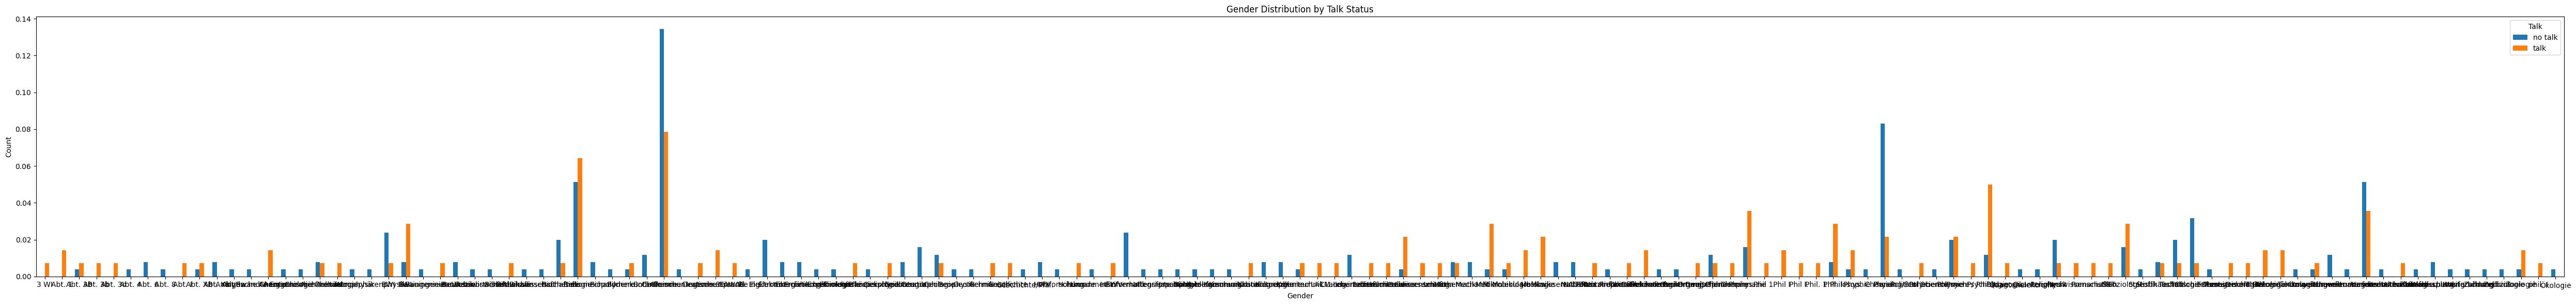

In [83]:
crosstab = pd.crosstab(dataframe_for_export['subject'], dataframe_for_export['gender'],normalize='columns')
print(crosstab)
ax = crosstab.plot(kind='bar', figsize=(50, 6))
plt.title('Gender Distribution by Talk Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Talk', labels=['no talk', 'talk'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
occupations=participants_1995['occupation'].unique()
count_1989=participants_1989['occupation'].value_counts()
total_number_1989=len(participants_1989['occupation'])
norm_count_1989=count_1989/total_number_1989*100
print(norm_count_1989)

count_1991=participants_1991['occupation'].value_counts()
total_number_1991=len(participants_1991['occupation'])
norm_count_1991=count_1991/total_number_1991*100
print(norm_count_1991)

count_1992=participants_1992['occupation'].value_counts()
total_number_1992=len(participants_1992['occupation'])
norm_count_1992=count_1992/total_number_1992*100
print(norm_count_1992)

count_1994=participants_1994['occupation'].value_counts()
total_number_1994=len(participants_1994['occupation'])
norm_count_1994=count_1994/total_number_1994*100
print(norm_count_1994)

count_1995=participants_1995['occupation'].value_counts()
total_number_1995=len(participants_1995['occupation'])
norm_count_1995=count_1995/total_number_1995*100
print(norm_count_1995)

count_1996=participants_1996['occupation'].value_counts()
total_number_1996=len(participants_1996['occupation'])
norm_count_1996=count_1996/total_number_1996*100
print(norm_count_1996)

count_1997=participants_1997['occupation'].value_counts()
total_number_1997=len(participants_1997['occupation'])
norm_count_1997=count_1997/total_number_1997*100
print(norm_count_1997)

count_1998=participants_1998['occupation'].value_counts()
total_number_1998=len(participants_1998['occupation'])
norm_count_1998=count_1998/total_number_1998*100
print(norm_count_1998)





occupation
ST               15.909091
not available    15.151515
DO               15.151515
Dozent:in        11.363636
Therapie          9.090909
Künstler:in       7.575758
MA                6.818182
Chemiker:in       5.303030
Medizin           4.545455
Akademisch        3.787879
Office            3.030303
Lehrer:in         1.515152
Architekt:in      0.757576
Name: count, dtype: float64
occupation
ST                19.424460
not available     18.705036
Dozent:in         11.510791
MA                11.510791
DO                11.510791
Therapie           6.474820
Künstler:in        6.474820
Office             5.035971
Chemiker:in        3.597122
Akademisch         2.877698
Unternehmer:in     1.438849
Medizin            0.719424
Journalist:in      0.719424
Name: count, dtype: float64
occupation
DO                26.666667
MA                10.666667
Künstler:in       10.000000
not available     10.000000
ST                10.000000
Dozent:in          7.333333
Chemiker:in        6.666667


In [93]:
count_names=total_dataframe.value_counts()
print(count_names)
display(count_names.to_string())
print(sum(count_names >5))
print(sum(count_names ==1))
print(sum(count_names >2))
print(sum(count_names ==4))


name
Willi Gutmann          9
Pier Luigi Luisi       9
Suzanne Monard         9
Claudia Scheidegger    9
Peter Walde            8
                      ..
Gregor Jenzer          1
Urs Joss               1
Marlen Karlen          1
Simon Lerch            1
Sonia MacPherson       1
Name: count, Length: 805, dtype: int64


"name\nWilli Gutmann                   9\nPier Luigi Luisi                9\nSuzanne Monard                  9\nClaudia Scheidegger             9\nPeter Walde                     8\nJohn Wolf Brennan               8\nCornelia Walterspiel            8\nJörg Rasche                     8\nBranco Weiss                    7\nPeter Binz                      7\nBeatrice Lüthi                  7\nDoris Lässer-Aeppli             7\nBarbara Jäckli                  6\nThomas Schulte-Herbrüggen       6\nKathrin Graf                    6\nMonika Matta                    6\nAlbert Hofmann                  6\nBeate Kortendieck-Rasche        6\nJochen Jaeger                   6\nDiana Hornung                   5\nUlrich Müller-Herold            5\nRocco Ciorciaro                 5\nGiancarlo Testa                 5\nRoland Ris                      5\nKurt Dressler                   5\nHeinz Roth                      5\nPierre Funck                    5\nMonica Casutt                   5\nMartin Scheri

19
576
105
25


In [96]:
count_1997=participants_1997['occupation'].value_counts()
print(count_1997)
total_number_1997=len(participants_1997['occupation'])
norm_count_1997=count_1997/total_number_1997*100
print(norm_count_1997)


occupation
DO                   51
ST                   22
not available        20
Akademisch           12
MA                   10
Therapie              7
Künstler:in           7
Workshopleiter:in     6
Medizin               5
Chemiker:in           4
Dozent:in             4
Office                3
Rechtsanwältin        1
Lehrer:in             1
Name: count, dtype: int64
occupation
DO                   33.333333
ST                   14.379085
not available        13.071895
Akademisch            7.843137
MA                    6.535948
Therapie              4.575163
Künstler:in           4.575163
Workshopleiter:in     3.921569
Medizin               3.267974
Chemiker:in           2.614379
Dozent:in             2.614379
Office                1.960784
Rechtsanwältin        0.653595
Lehrer:in             0.653595
Name: count, dtype: float64
